In [1]:
!pip3 install torch

In [2]:
import torch
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

import torch.nn as nn

Using sklearn we will create linearly separable dataset and using Torch we create a perceptron based neural network. Using this perceptron, we will use it to train our dataset such that it separates our dataset into 2 different classes.

<h3>Creating the Dataset</h3>

In [3]:
n_pts = 100
centers = [[-0.5,0.5],[0.5,-0.5]]

X, y = datasets.make_blobs(n_samples=n_pts, centers=centers, cluster_std=0.4, random_state=123) #creates cluster of datapoints that are randomnly centered around a chosen centre 
print(X)
print(y)

x_data = torch.Tensor(X)
y_data = torch.Tensor(y.reshape(100,1))

[[-0.13715792 -0.07147228]
 [ 0.80437976 -0.37061246]
 [-0.60224775 -0.61943564]
 [ 0.57087693 -0.5119872 ]
 [ 0.0063745   0.15330384]
 [-0.87433355  0.97033162]
 [ 0.19742512 -0.37132537]
 [-0.6340043   0.91244578]
 [-0.48180397  0.40676318]
 [ 0.19748489  0.18077491]
 [-0.62590326  0.06563904]
 [-0.31262435  0.16753801]
 [-0.1085056   1.39525734]
 [ 0.09825765  0.92775707]
 [-0.36456438  0.4952678 ]
 [ 0.75682188 -1.29115517]
 [ 0.33484534  0.56577649]
 [-0.66134642  0.44958817]
 [ 0.34335208 -0.44400876]
 [-0.42758595  0.97114478]
 [-0.09837844  0.65447456]
 [ 0.45694611  0.66516486]
 [-0.12901503  0.43054573]
 [ 0.67045866 -1.1421639 ]
 [ 0.82493653 -0.30010394]
 [ 0.72261948 -0.58483205]
 [-0.49886163  0.77528908]
 [-0.03991778 -0.00694082]
 [ 1.05814117 -0.64357437]
 [ 0.60152659 -0.38650986]
 [ 0.57181979 -1.24479028]
 [-0.20505257  1.09629281]
 [ 1.14347639 -0.60809296]
 [-0.97932046  0.57980963]
 [ 0.20367449 -0.4708371 ]
 [-0.79298479  0.01499075]
 [ 0.5081264  -0.57758555]
 

In [4]:
def scatter_plot():
  plt.scatter(X[y==0,0], X[y==0,1])
  plt.scatter(X[y==1,0], X[y==1,1])

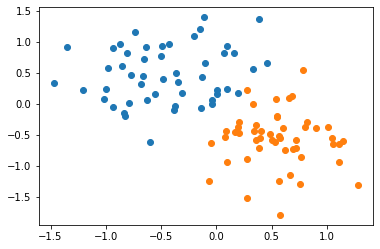

In [5]:
scatter_plot()

<h3>Building the Model</h3>

Now we create a model to separate our dataset. Using this trained model, we will use it to classify unlabelled points.

In [6]:
class Model(nn.Module):
    
  def __init__(self, input_size, output_size): 
    super().__init__()   #class inheritance
    self.linear = nn.Linear(input_size, output_size)

  def forward(self, x):
    pred = torch.sigmoid(self.linear(x)) #to convert answer to probability
    return pred

  def predict(self, x):
    pred = self.forward(x)
    if pred >= 0.5:
      return 1
    else:
      return 0    

In [7]:
torch.manual_seed(2)
model = Model(2,1)

print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.1622, -0.1683]], requires_grad=True), Parameter containing:
tensor([0.1939], requires_grad=True)]


In [8]:
[w, b] = model.parameters()
w1, w2 = w.view(2)
b1 = b[0]

def get_params():
   return w1.item(), w2.item(), b[0].item()

Creating a function to plot our data with the line.

In [9]:
def plot_fit(title):
    
  plt.title = title
  #w1x1+w2x2+b
  w1, w2, b1 = get_params()
  x1 = np.array([-2.0,2.0])
  x2 = (w1*x1+b1)/-w2

  plt.plot(x1,x2,'r')
  scatter_plot()

  print(w1,w2,b1)

0.16220331192016602 -0.1682732105255127 0.19390898942947388


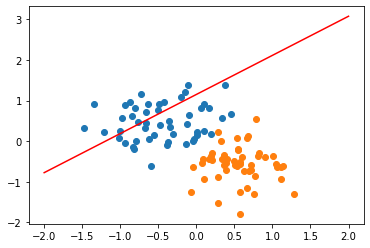

In [10]:
plot_fit('initial model')

Setting the criteria for loss function and the optimization technique to be used.

In [11]:
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

Training the model.

In [12]:
epochs = 1000
losses = []

for i in range(epochs):
    
  y_pred = model.forward(x_data)
  loss = criterion(y_pred, y_data)
    
  print("epoch: ", i, " loss:", loss.item())

  losses.append(loss.item())
  optimizer.zero_grad()
  loss.backward() #calculating gradient
  optimizer.step() #update model parameters

epoch:  0  loss: 0.6185115575790405
epoch:  1  loss: 0.617464005947113
epoch:  2  loss: 0.6164200305938721
epoch:  3  loss: 0.6153795123100281
epoch:  4  loss: 0.6143423914909363
epoch:  5  loss: 0.6133086681365967
epoch:  6  loss: 0.6122783422470093
epoch:  7  loss: 0.6112514734268188
epoch:  8  loss: 0.6102279424667358
epoch:  9  loss: 0.6092078685760498
epoch:  10  loss: 0.6081911325454712
epoch:  11  loss: 0.6071776747703552
epoch:  12  loss: 0.606167733669281
epoch:  13  loss: 0.6051609516143799
epoch:  14  loss: 0.604157567024231
epoch:  15  loss: 0.6031573414802551
epoch:  16  loss: 0.6021605730056763
epoch:  17  loss: 0.6011670231819153
epoch:  18  loss: 0.6001767516136169
epoch:  19  loss: 0.599189817905426
epoch:  20  loss: 0.5982059240341187
epoch:  21  loss: 0.5972253680229187
epoch:  22  loss: 0.5962480306625366
epoch:  23  loss: 0.5952739119529724
epoch:  24  loss: 0.5943029522895813
epoch:  25  loss: 0.5933352112770081
epoch:  26  loss: 0.5923706293106079
epoch:  27  los

Text(0.5, 0, 'EPOCHS')

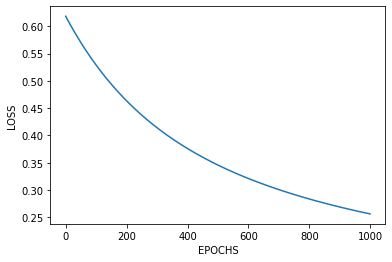

In [13]:
plt.plot(range(epochs),losses)
plt.ylabel('LOSS')
plt.xlabel("EPOCHS")

<h3>Model Testing</h3>

red point prob: 0.9424158334732056
black point prob: 0.05055497586727142
red point in class: 1
black point in class: 0
1.4355946779251099 -1.4284123182296753 -0.06880919635295868


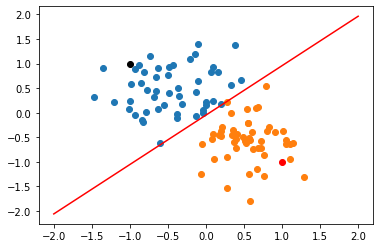

In [14]:
point1 = torch.Tensor([1.0, -1.0])
point2 = torch.Tensor([-1.0, 1.0])

plt.plot(point1.numpy()[0], point1.numpy()[1], 'ro')
plt.plot(point2.numpy()[0], point2.numpy()[1], 'ko')

print("red point prob: {}".format(model.forward(point1).item()))
print("black point prob: {}".format(model.forward(point2).item()))

print("red point in class: {}".format(model.predict(point1)))
print("black point in class: {}".format(model.predict(point2)))

plot_fit('trained model')